## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing d files
em_left = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name='Employees who have left')
#em_left for exployees that have left while em_exist for existing employees
em_exist = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name='Existing employees')

In [3]:
em_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [4]:
em_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
Emp ID                   3571 non-null int64
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
promotion_last_5years    3571 non-null int64
dept                     3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


### Cleaning the Data

In [5]:
#dropping the arbitrary emp id column
em_left.drop('Emp ID', axis = 1, inplace = True)
em_exist.drop('Emp ID', axis = 1, inplace = True)

In [6]:
em_left.rename({'Work_accident':'Work_accident_yes'}, axis = 1, inplace = True)
em_exist.rename({'Work_accident':'Work_accident_yes'}, axis = 1, inplace = True)

## Combining the DataFrames

To achieve more from the analysis, I opted to combine the data while simultaneously creating a status column that will hold value whether an employee is still remaining or has left the company. This was done because i needed to perform a correlation of the various numerical items with the status column to know which of the columns had the highest effect on the status column. 

In [7]:
# represents whether the employee has left{1: left, 0: remaining}
em_left['status'] = 1
em_exist['status'] = 0

#merging both dataframes
combined = pd.concat([em_left, em_exist], sort = True, ignore_index= True)

In [8]:
#finding correlation between the status column and the employee status
np.abs(combined.corr())['status'].sort_values(ascending = False)

status                   1.000000
satisfaction_level       0.388375
Work_accident_yes        0.154622
time_spend_company       0.144822
average_montly_hours     0.071287
promotion_last_5years    0.061788
number_project           0.023787
last_evaluation          0.006567
Name: status, dtype: float64

In [9]:
#getting dummies for the non numerical (dept and salary) columns to enable a correlation to be performed easily
dummies = pd.get_dummies(combined[['dept', 'salary']])

In [10]:
combined = pd.concat([combined.drop(['dept', 'salary'],
                                     axis = 1), dummies], axis = 1, sort = True)

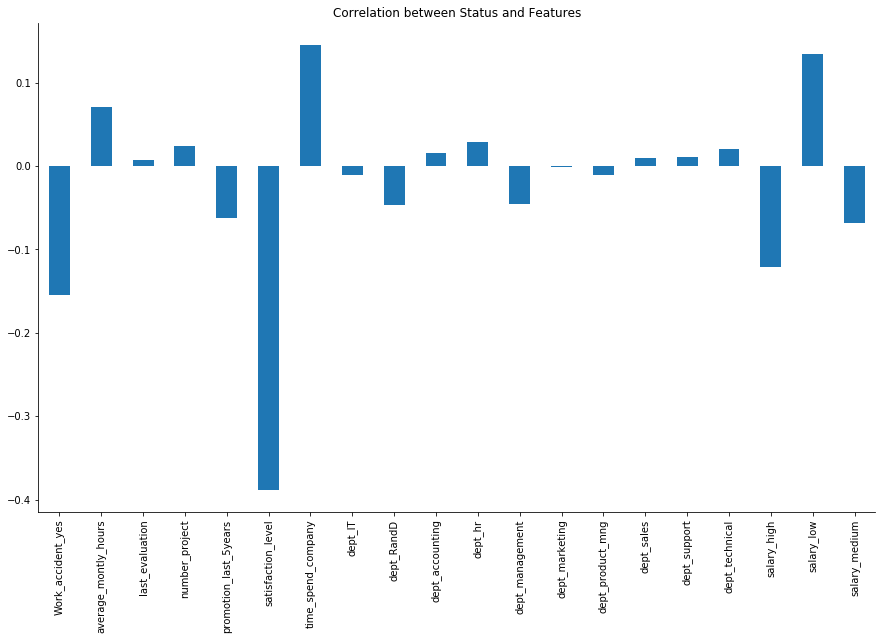

In [11]:
corr_combined = combined.corr()['status'].drop('status')

corr_combined.plot.bar(figsize = (15,9), title='Correlation between Status and Features')
sns.despine();

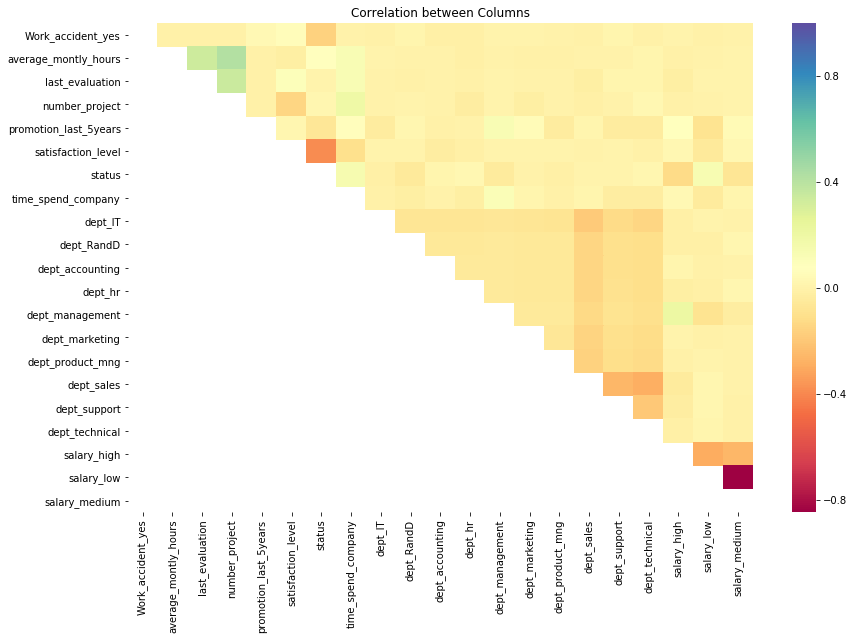

In [12]:
mask = np.tril(combined.corr())
plt.figure(figsize = (14, 9))
sns.heatmap(combined.corr(), mask = mask, cmap='Spectral')
plt.title('Correlation between Columns');

In [13]:
#selecting the values with greatest correlation
corr_combined[corr_combined > 0.1]

time_spend_company    0.144822
salary_low            0.134722
Name: status, dtype: float64

The values that had the most effect on the whether employees stayed or remain are **'satisfaction_level', 'Work_accident', 'time_spend_company', 'salary_low' and 'salary_high'**. Lets explore these columns to know how they exert their influence on the status column. 

## Satisfaction Level

In [14]:
em_left.satisfaction_level.describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

In [15]:
em_exist['satisfaction_level'].describe()

count    11428.000000
mean         0.666810
std          0.217104
min          0.120000
25%          0.540000
50%          0.690000
75%          0.840000
max          1.000000
Name: satisfaction_level, dtype: float64

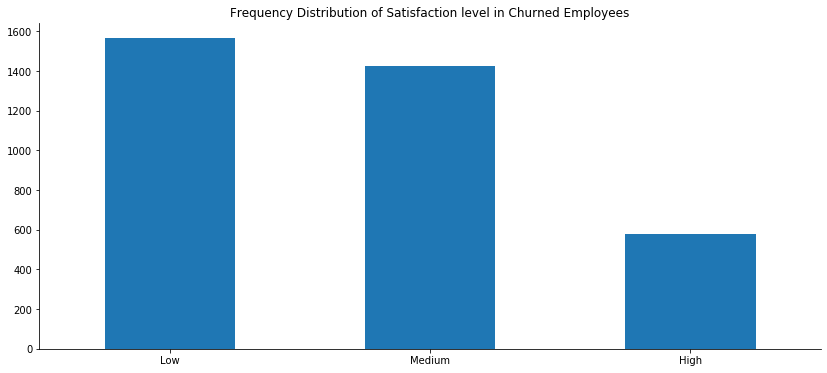

In [16]:
(pd.cut(em_left['satisfaction_level'], [0, 0.4,0.8,1], labels = ['Low', 'Medium', 'High'], right = False).value_counts()).plot.bar(
figsize = (14,6), title='Frequency Distribution of Satisfaction level in Churned Employees')
plt.xticks(rotation = 0)
sns.despine();

In [17]:
pd.cut(em_exist['satisfaction_level'], [0, 0.4,0.8,1], labels = ['low', 'medium', 'high'], right=False).value_counts()

medium    6432
high      3536
low       1349
Name: satisfaction_level, dtype: int64

The Satisfaction level for both datasets shows that employees who left have a lower satisfaction level as compared to those who are remaining. Dividing the dataset into three categories provides more perspective; people with low (0-0.4) satisfaction levels left the company more than those with medium (0.41 - 0.8) and high (0.81 - 1.0) satisfaction levels

## Work Accident

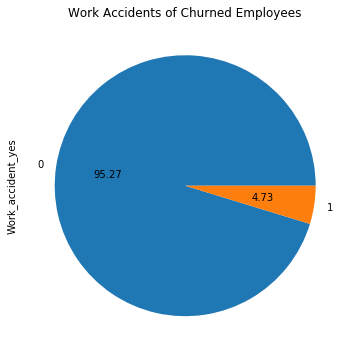

In [18]:
(em_left['Work_accident_yes'].value_counts(normalize = True) * 100).plot.pie(
    figsize = (14,6), title='Work Accidents of Churned Employees', autopct='%.2f');

From the analysis above, it shows that over 90% of those who had 0 work accidents left the company


## Time spent in Company

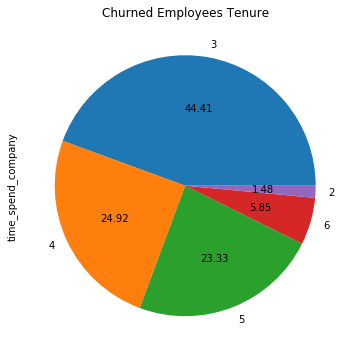

In [19]:
(em_left['time_spend_company'].value_counts(normalize = True) * 100).plot.pie(
    figsize = (14,6), title='Churned Employees Tenure', autopct='%.2f');

From this exploration it showed that the employees that work for 3,4 or 5 years were more likely to churn while the those who are about two (2) years and six years are least likely to.

## Salaries

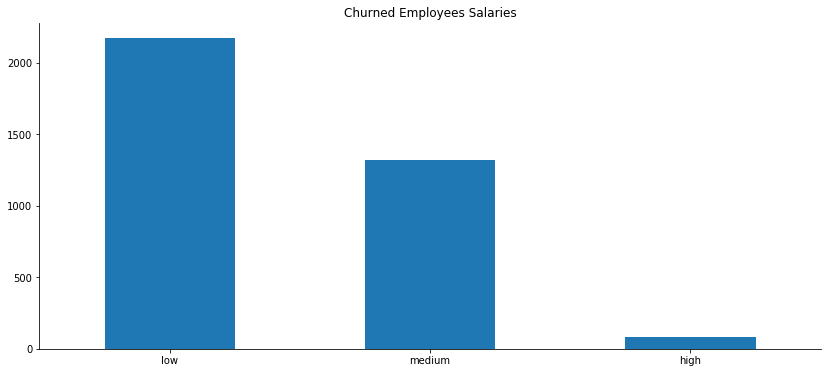

In [20]:
(em_left['salary'].value_counts()).plot.bar(
figsize = (14,6), title='Churned Employees Salaries')
plt.xticks(rotation = 0)
sns.despine();

The features we discussed above have been explored and the most frequently occuring categories observed. Thus we can conclusively say employees who are **paid medium or low salaries with satisfaction rates between 0 and 0.4, who have work accidents and have spent between 3 -5 years are more likely to churn**. 


## Existing Employees likely to Churn

From our analysis, we can now bring out the existing employees that are most likely to churn.  

In [21]:
#selecting medium and low salary earners who have spent 3-5 years in the existing employees
sal_years = em_exist[(em_exist['salary'].isin(['medium', 'low'])) & (em_exist['time_spend_company'].isin([3,4,5]))]

In [22]:
#creating a satisfaction_grade column
sal_years['satis_grade'] = pd.cut(sal_years['satisfaction_level'].copy(), [0, 0.4,0.8,1], right = False, labels = ['low', 'medium', 'high'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
#employees with low  satisfaction and have been accidented at work
likely_churn = sal_years[(sal_years['Work_accident_yes'] == 0) & (sal_years['satis_grade'] == 'low')]

In [24]:
likely_churn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident_yes,promotion_last_5years,dept,salary,status,satis_grade
5,0.36,0.95,3,206,4,0,0,sales,low,0,low
11,0.34,0.39,2,136,3,0,0,sales,medium,0,low
36,0.19,0.53,6,191,4,0,0,support,low,0,low
43,0.33,0.88,6,260,3,0,0,technical,low,0,low
65,0.15,0.97,3,198,5,0,0,management,medium,0,low


In [25]:
percent = round((likely_churn.shape[0] / em_exist.shape[0] ) * 100, 2)

print(str(percent)+'%' + ' of existing employees are most likely going to churn' )

5.88% of existing employees are most likely going to churn
